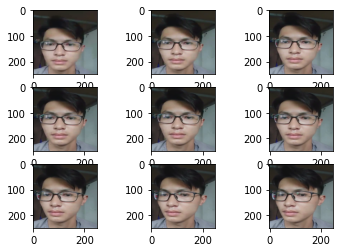

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/dulieu/nhandien3khuonmat/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'the_000'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/dulieu/nhandien3khuonmat/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('the'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('tuan'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('huy'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('KhuonMat_photos.npy', photos)
save('KhuonMat_labels.npy', labels)

(299, 200, 200, 3) (299,)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (200,200,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 14s 126ms/step - loss: 812.9508 - accuracy: 0.6054
Epoch 2/50
10/10 [==============================] - 1s 82ms/step - loss: 0.1138 - accuracy: 0.9967
Epoch 3/50
10/10 [==============================] - 1s 82ms/step - loss: 2.6343e-06 - accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 1s 81ms/step - loss: 38.0516 - accuracy: 0.9064
Epoch 5/50
10/10 [==============================] - 1s 84ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 1s 81ms/step - loss: 7.3363 - accuracy: 0.9365
Epoch 7/50
10/10 [==============================] - 1s 82ms/step - loss: 1.8976 - accuracy: 0.9866
Epoch 8/50
10/10 [==============================] - 1s 81ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/50
10/10 [==============================] - 1s 82ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/50
10/10 [==============================] - 1s 80ms/step - loss: 0.0000e+00 - a

In [5]:
model.evaluate(photos,labels)

10/10 [==============================] - 1s 42ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [6]:
model.save('3Face_Detect_Final.h5')

In [7]:
from keras.models import load_model
models=load_model('3Face_Detect_Final.h5')

In [8]:
classes = ["the","tuan","huy"]

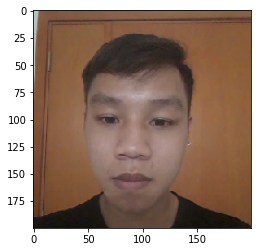

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/dulieu/nhandien3khuonmat/huy_0004.bmp', 
               target_size=(200,200))
plt.imshow(img)

In [10]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print(classes[y_classes[0]])

[[7.4028278e-05 5.9553573e-04 9.9932992e-01 1.6179049e-18 1.0506598e-08
  1.3527843e-08 4.0787616e-11 3.3509726e-11 4.7922714e-11 3.6057840e-10
  5.6515569e-07]]
huy
